# Amazon Sales Project

Imported libraries required

In [849]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Loded dataset 

In [850]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Data analyst\Data_Science_Project\Python\Amazon\Amazon_Sale_Report.csv", low_memory= False)

In [851]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [852]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

 Changed Datatype of Columns

In [853]:
New_data_type = {'index': object, 'ship-postal-code': object}
df = df.astype(New_data_type)
df.dtypes

index                  object
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code       object
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

Checked All Unique Values 

In [854]:
df.nunique()

index                 128975
Order ID              120378
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Style                   1377
SKU                     7195
Category                   9
Size                      11
ASIN                    7190
Courier Status             3
Qty                       10
currency                   1
Amount                  1410
ship-city               8955
ship-state                69
ship-postal-code        9459
ship-country               1
promotion-ids           5787
B2B                        2
fulfilled-by               1
Unnamed: 22                1
dtype: int64

In [855]:
df.describe()

,Qty,Amount
count,128975.000000,121180.000000
mean,0.904431,648.561465
std,0.313354,281.211687
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,15.000000,5584.000000


Checked Columns Present in Dataframe

In [856]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

Dropped column from dataset which are not useful

In [857]:
# reomoved following columns from dataset
Columns_to_drop = ['index', 'Sales Channel ','currency', 'ship-country', 'fulfilled-by', 'Unnamed: 22']
df.drop(Columns_to_drop, axis = 1, inplace = True)

In [858]:
df.head()

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False


 Checked Format of Date Column Before Performing Operation on Date Column

In [859]:
df['Date']

0         04-30-22
1         04-30-22
2         04-30-22
3         04-30-22
4         04-30-22
            ...   
128970    05-31-22
128971    05-31-22
128972    05-31-22
128973    05-31-22
128974    05-31-22
Name: Date, Length: 128975, dtype: object

Changed Date to Proper Date Format

In [860]:
df['Date'] = pd.to_datetime(df['Date'])

In [861]:
df.head()

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False


Dropped March Month From Dataframe

In [862]:
month_to_delete = 3
mask = df['Date'].dt.month == month_to_delete
df = df[~mask]

In [863]:
df

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,TELANGANA,500013.0,NaN,False
128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.00,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.00,HYDERABAD,TELANGANA,500049.0,NaN,False
128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,1199.00,Halol,Gujarat,389350.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


Created an ordered category from  'size' column

In [864]:
# size_order = ['XS','S','M', 'L', 'XL','XXL','3XL','4XL','5XL','6XL','Free']
# df['size'] = pd.Categorical(df['Size'], categories=size_order, ordered=True)
# df.head()

Checked Duplicates Between Order ID and ASIN Columns 

In [865]:
duplicate_counts = df.duplicated(subset=['Order ID', 'ASIN']).sum()
print(f"Duplicate Between Order ID and ASIN:{duplicate_counts}")

Duplicate Between Order ID and ASIN:7


Dropped Duplicate Values From Order ID and ASIN

In [866]:
df.drop_duplicates(subset=['Order ID', 'ASIN'], inplace=True)

Checked Duplicate Count After Performing Operation

In [867]:
duplicate_counts_after_operation = df.duplicated(subset=['Order ID', 'ASIN']).sum()
print(f"Duplicate Between Order ID and ASIN after Operation :{duplicate_counts_after_operation}")

Duplicate Between Order ID and ASIN after Operation :0


Checked For Null Values 

In [868]:
null_values = df.isnull().sum()

print(null_values)

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6866
Qty                       0
Amount                 7783
ship-city                33
ship-state               33
ship-postal-code         33
promotion-ids         49088
B2B                       0
dtype: int64


Filled missing values in columns with appropriate value.

In [869]:
#  filled missing values of courier status column with unknown

df['Courier Status'] = df['Courier Status'].fillna('Unknown')

In [870]:
df['Courier Status']

0         Unknown
1         Shipped
2         Shipped
3         Unknown
4         Shipped
           ...   
128970    Shipped
128971    Shipped
128972    Shipped
128973    Shipped
128974    Shipped
Name: Courier Status, Length: 128797, dtype: object

In [871]:
#  filled missing values of promotion-ids column with No Promotion 

df['promotion-ids'] = df['promotion-ids'].fillna('No Promotion')

In [872]:
df.head()

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,No Promotion,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,No Promotion,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,No Promotion,False


In [873]:
df['Size'].unique()

array(['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', '5XL',
       'Free'], dtype=object)

In [874]:
#  filled missing values of Amount column with 0.
df['Amount'] = df['Amount'].fillna(0)

In [875]:
#  in ship- city column city names are not in uniform 
df['ship-city']

0              MUMBAI
1           BENGALURU
2         NAVI MUMBAI
3          PUDUCHERRY
4             CHENNAI
             ...     
128970      HYDERABAD
128971       GURUGRAM
128972      HYDERABAD
128973          Halol
128974         Raipur
Name: ship-city, Length: 128797, dtype: object

Changed Values of 'ship-city' Column into Title Form

In [876]:
df['ship-city'] = df['ship-city'].str.title()

In [877]:
df['ship-state']

0          MAHARASHTRA
1            KARNATAKA
2          MAHARASHTRA
3           PUDUCHERRY
4           TAMIL NADU
              ...     
128970       TELANGANA
128971         HARYANA
128972       TELANGANA
128973         Gujarat
128974    CHHATTISGARH
Name: ship-state, Length: 128797, dtype: object

Changed Values of 'ship-state' Column into Title Form

In [878]:
df['ship-state'] = df['ship-state'].str.title()

In [879]:
df.head()

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,Mumbai,Maharashtra,400081.0,No Promotion,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,Bengaluru,Karnataka,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,Navi Mumbai,Maharashtra,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,753.33,Puducherry,Puducherry,605008.0,No Promotion,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,Chennai,Tamil Nadu,600073.0,No Promotion,False


Changed Missing Values of 'ship-city', 'ship-state' to Unknown and 'ship-postal-code' Missing Values to Not Found.

In [880]:
df['ship-city'] = df['ship-city'].fillna('Unknown')
df['ship-state'] = df['ship-state'].fillna('Unknown')
df['ship-postal-code'] = df['ship-postal-code'].fillna('Not Found')

In [881]:
df.head()

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,Mumbai,Maharashtra,400081.0,No Promotion,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,Bengaluru,Karnataka,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,Navi Mumbai,Maharashtra,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,753.33,Puducherry,Puducherry,605008.0,No Promotion,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,Chennai,Tamil Nadu,600073.0,No Promotion,False


Checked Null Values in Dataset After Filling All Columns

In [882]:
null_values_after_filling_column = df.isnull().sum()

print(null_values_after_filling_column)

Order ID              0
Date                  0
Status                0
Fulfilment            0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
promotion-ids         0
B2B                   0
dtype: int64


Changed All column Names to Title Form

In [883]:
df.columns = df.columns.str.title()

In [884]:
df.head()

,Order Id,Date,Status,Fulfilment,Ship-Service-Level,Style,Sku,Category,Size,Asin,Courier Status,Qty,Amount,Ship-City,Ship-State,Ship-Postal-Code,Promotion-Ids,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,Mumbai,Maharashtra,400081.0,No Promotion,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,Bengaluru,Karnataka,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,Navi Mumbai,Maharashtra,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,753.33,Puducherry,Puducherry,605008.0,No Promotion,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,Chennai,Tamil Nadu,600073.0,No Promotion,False


 Renamed B2B Column Name with Customer_type 

In [885]:
df.rename(columns={'B2B':'Customer_Type'}, inplace = True)

Updated vValues of Customer_Type as Per Requirement

In [886]:
# updated values of Customer_Type column 
# True => Business
# False => Customer

# df['Customer_Type'].replace(True,'Business', inplace = True ) 
# df['Customer_Type'].replace(False, 'Customer', inplace=True)

df['Customer_Type'].replace({True: 'Business', False: 'Customer'}, inplace=True)


In [887]:
df.head()

,Order Id,Date,Status,Fulfilment,Ship-Service-Level,Style,Sku,Category,Size,Asin,Courier Status,Qty,Amount,Ship-City,Ship-State,Ship-Postal-Code,Promotion-Ids,Customer_Type
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,Mumbai,Maharashtra,400081.0,No Promotion,Customer
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,Bengaluru,Karnataka,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,Customer
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,Navi Mumbai,Maharashtra,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Business
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,753.33,Puducherry,Puducherry,605008.0,No Promotion,Customer
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,Chennai,Tamil Nadu,600073.0,No Promotion,Customer


Created of New Column Order_Amount_($)

In [888]:
# creating new column Order_Amount_($) from pre-existing column Amount
exchange_rate = 0.0120988

# df['Order_Amount_($)'] = df['Amount'] * exchange_rate
# df['Order_Amount_($)'] = df['Amount'].apply(lambda x:x* exchange_rate)

# Added new column next to origical column
df.insert(df.columns.get_loc('Amount') + 1, 'Order_Amount_($)', df['Amount'].apply(lambda x:round( x * exchange_rate,2)))

In [889]:
df.head()

,Order Id,Date,Status,Fulfilment,Ship-Service-Level,Style,Sku,Category,Size,Asin,Courier Status,Qty,Amount,Order_Amount_($),Ship-City,Ship-State,Ship-Postal-Code,Promotion-Ids,Customer_Type
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,7.84,Mumbai,Maharashtra,400081.0,No Promotion,Customer
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,4.91,Bengaluru,Karnataka,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,Customer
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,3.98,Navi Mumbai,Maharashtra,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Business
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,753.33,9.11,Puducherry,Puducherry,605008.0,No Promotion,Customer
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,6.94,Chennai,Tamil Nadu,600073.0,No Promotion,Customer


Created New column Order_Month Column  from Preexsiting Date Column  

In [890]:
# df['Order_Month'] = df['Date'].dt.month
df.insert(df.columns.get_loc('Date') + 1, 'Order_Month', df['Date'].dt.strftime('%B'))

In [891]:
df.head()

,Order Id,Date,Order_Month,Status,Fulfilment,Ship-Service-Level,Style,Sku,Category,Size,Asin,Courier Status,Qty,Amount,Order_Amount_($),Ship-City,Ship-State,Ship-Postal-Code,Promotion-Ids,Customer_Type
0,405-8078784-5731545,2022-04-30,April,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,7.84,Mumbai,Maharashtra,400081.0,No Promotion,Customer
1,171-9198151-1101146,2022-04-30,April,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,4.91,Bengaluru,Karnataka,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,Customer
2,404-0687676-7273146,2022-04-30,April,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,3.98,Navi Mumbai,Maharashtra,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Business
3,403-9615377-8133951,2022-04-30,April,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,753.33,9.11,Puducherry,Puducherry,605008.0,No Promotion,Customer
4,407-1069790-7240320,2022-04-30,April,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,6.94,Chennai,Tamil Nadu,600073.0,No Promotion,Customer


Checked Datatypes of Columns 

In [892]:
df.dtypes

Order Id                      object
Date                  datetime64[ns]
Order_Month                   object
Status                        object
Fulfilment                    object
Ship-Service-Level            object
Style                         object
Sku                           object
Category                      object
Size                          object
Asin                          object
Courier Status                object
Qty                            int64
Amount                       float64
Order_Amount_($)             float64
Ship-City                     object
Ship-State                    object
Ship-Postal-Code              object
Promotion-Ids                 object
Customer_Type                 object
dtype: object

Checked Unique Values  of Ship-State 

In [893]:
df['Ship-State'].unique()

array(['Maharashtra', 'Karnataka', 'Puducherry', 'Tamil Nadu',
       'Uttar Pradesh', 'Chandigarh', 'Telangana', 'Andhra Pradesh',
       'Rajasthan', 'Delhi', 'Haryana', 'Assam', 'Jharkhand',
       'Chhattisgarh', 'Odisha', 'Kerala', 'Madhya Pradesh',
       'West Bengal', 'Nagaland', 'Gujarat', 'Uttarakhand', 'Bihar',
       'Jammu & Kashmir', 'Punjab', 'Himachal Pradesh',
       'Arunachal Pradesh', 'Manipur', 'Goa', 'Meghalaya', 'Tripura',
       'Ladakh', 'Dadra And Nagar', 'Sikkim', 'Unknown',
       'Andaman & Nicobar ', 'Rajshthan', 'Nl', 'Mizoram', 'New Delhi',
       'Punjab/Mohali/Zirakpur', 'Rj', 'Orissa', 'Lakshadweep', 'Pb',
       'Apo', 'Ar', 'Pondicherry', 'Rajsthan'], dtype=object)

Replaced Values of Ship-State Column 

In [894]:
# replaced values of state columnn
# AR > Arunachal Pradesh
# NL > Nagaland
# orrisa > odisha
# PB > Punjab
# Puducherry > Pondicherry 
# Punjab/Mohali/Zirakpur > Punjab
# Rj/Rajshthan/rajsthan > Rajasthan 


df['Ship-State'] = df['Ship-State'].replace(['Rj', 'Rajshthan', 'Rajsthan'], 'Rajasthan', regex=True)
df['Ship-State'] = df['Ship-State'].replace('Ar', 'Arunachal Pradesh', regex=True)
df['Ship-State'] = df['Ship-State'].replace('Nl', 'Nagaland', regex=True)
df['Ship-State'] = df['Ship-State'].replace('Punjab/Mohali/Zirakpur','Punjab', regex=True)
df['Ship-State'] = df['Ship-State'].replace(['Orrisa','Orissa'], 'Odisha', regex=True)
df['Ship-State'] = df['Ship-State'].replace('Puducherry', 'Pondicherry', regex=True)
df['Ship-State'] = df['Ship-State'].replace('Pb', 'Punjab', regex=True)
df['Ship-State'] = df['Ship-State'].replace('Dadra And Nagar', 'Dadra and Nagar Haveli', regex=True)
df['Ship-State'] = df['Ship-State'].replace(['Arunachal Pradeshunachal Pradesh','  Arunachal Pradeshunachal Pradeshunachal Pradesh'], 'Arunachal Pradesh', regex=True)
df['Ship-State'] = df['Ship-State'].replace('Arunachal Pradeshunachal Pradesh', 'Arunachal Pradesh', regex=True)

Checked Column Names

In [895]:
df.columns

Index(['Order Id', 'Date', 'Order_Month', 'Status', 'Fulfilment',
       'Ship-Service-Level', 'Style', 'Sku', 'Category', 'Size', 'Asin',
       'Courier Status', 'Qty', 'Amount', 'Order_Amount_($)', 'Ship-City',
       'Ship-State', 'Ship-Postal-Code', 'Promotion-Ids', 'Customer_Type'],
      dtype='object')

Renamed All Column Names

In [896]:

Renamed_columns = {'Order Id': 'Order_ID' , 'Date':'Order_Date', 'Status': 'Shipment_status',
                   'ship-Service-Level' :'Shipment_Service_Level', 'Sku':'SKU', 'Asin': 'ASIN',
                   'Courier Status' : 'Courier_Status', 'Qty':'Quantity', 'Amount':'Order_Amount_(INR)', 'Ship-City':'Ship_City',
                   'Ship-State':'Ship_State', 'ship-Postal-Code':'Zip_Code', 'Promotion-Ids' :'Promotion_IDs'}

df.rename(columns = Renamed_columns, inplace=True)

In [897]:
df.head()

,Order_ID,Order_Date,Order_Month,Shipment_status,Fulfilment,Ship-Service-Level,Style,SKU,Category,Size,ASIN,Courier_Status,Quantity,Order_Amount_(INR),Order_Amount_($),Ship_City,Ship_State,Ship-Postal-Code,Promotion_IDs,Customer_Type
0,405-8078784-5731545,2022-04-30,April,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,7.84,Mumbai,Maharashtra,400081.0,No Promotion,Customer
1,171-9198151-1101146,2022-04-30,April,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,4.91,Bengaluru,Karnataka,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,Customer
2,404-0687676-7273146,2022-04-30,April,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,3.98,Navi Mumbai,Maharashtra,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Business
3,403-9615377-8133951,2022-04-30,April,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,753.33,9.11,Puducherry,Pondicherry,605008.0,No Promotion,Customer
4,407-1069790-7240320,2022-04-30,April,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,6.94,Chennai,Tamil Nadu,600073.0,No Promotion,Customer


In [898]:
df.head()

,Order_ID,Order_Date,Order_Month,Shipment_status,Fulfilment,Ship-Service-Level,Style,SKU,Category,Size,ASIN,Courier_Status,Quantity,Order_Amount_(INR),Order_Amount_($),Ship_City,Ship_State,Ship-Postal-Code,Promotion_IDs,Customer_Type
0,405-8078784-5731545,2022-04-30,April,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,7.84,Mumbai,Maharashtra,400081.0,No Promotion,Customer
1,171-9198151-1101146,2022-04-30,April,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,4.91,Bengaluru,Karnataka,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,Customer
2,404-0687676-7273146,2022-04-30,April,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,3.98,Navi Mumbai,Maharashtra,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Business
3,403-9615377-8133951,2022-04-30,April,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,753.33,9.11,Puducherry,Pondicherry,605008.0,No Promotion,Customer
4,407-1069790-7240320,2022-04-30,April,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,6.94,Chennai,Tamil Nadu,600073.0,No Promotion,Customer


# Preliminary insights  

# Total Revenue of Amazon over three months

Amazon's total revenue for the second quarter (Q2) was ₹78,487,872.45. 

In [899]:
Total_Revenue = df['Order_Amount_(INR)'].sum()
print(f'Total revenue of amazon for Q2 : ₹ {Total_Revenue}')

Total revenue of amazon for Q2 : ₹ 78487872.45


# Total Revenue Month-wise

In [900]:
Revenue_by_Month = df.groupby('Order_Month')['Order_Amount_(INR)'].sum()
Total_Revenue_April = Revenue_by_Month['April']
print(f'Total Revenue of April Month : ₹ {Total_Revenue_April}')
Total_Revenue_May = Revenue_by_Month['May']
print(f'Total Revenue of May Month   : ₹ {Total_Revenue_May}')
Total_Revenue_June = Revenue_by_Month['June']
print(f'Total Revenue of June Month  : ₹ {Total_Revenue_June}')


Total Revenue of April Month : ₹ 28838708.32
Total Revenue of May Month   : ₹ 26224517.75
Total Revenue of June Month  : ₹ 23424646.38


# Revenue By Month

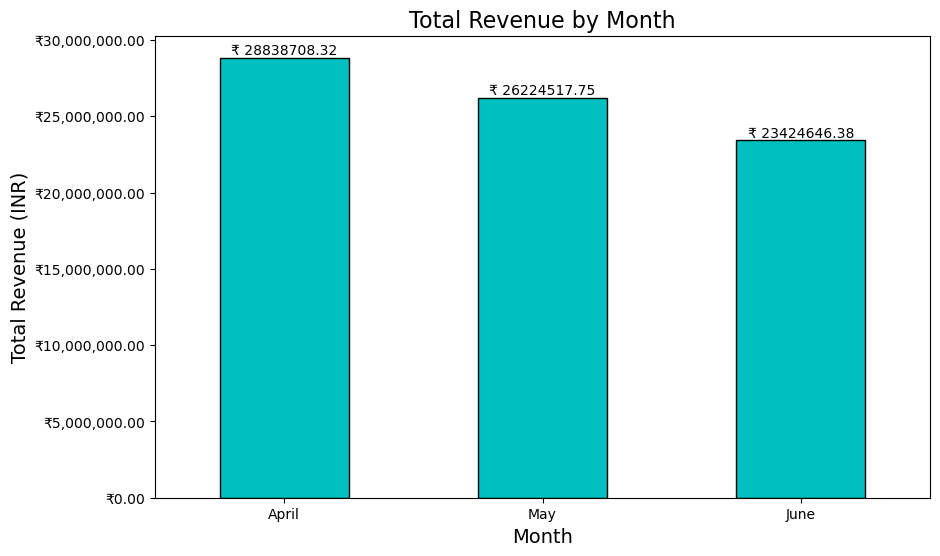

In [901]:

from matplotlib.ticker import FuncFormatter
Revenue_by_Month = df.groupby('Order_Month')['Order_Amount_(INR)'].sum()

# Sorted the months in chronlogical order
Revenue_by_Month_sorted = Revenue_by_Month.reindex(['April', 'May', 'June'])

# Plotting a bar chart for total revenue by month
plt.figure(figsize=(10, 6))
ax = Revenue_by_Month_sorted.plot(kind='bar', color='c', edgecolor='k') # c- cyan, K- black
plt.title('Total Revenue by Month', fontsize = 16)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Total Revenue (INR)', fontsize = 14)


# Defineed  function to format currency
def currency_formatter(x, y):
    return '₹{:,.2f}'.format(x)

# Format the y-axis ticks as currency
formatter = FuncFormatter(currency_formatter)
ax.yaxis.set_major_formatter(formatter)

# Adding value annotations on top of each bar
for i, value in enumerate(Revenue_by_Month_sorted):
    plt.text(i, value + 10, f'₹ {value:.2f}', ha='center', va='bottom', fontsize=10)
    
# Set x-axis labels to be horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.show()

# Decrease in Revenue Month-Wise 

In [902]:
Decrease_revenue_april_to_may = Revenue_by_Month['May']-Revenue_by_Month['April']
print(f'Decrease in revenue from April to May  : ₹ { Decrease_revenue_april_to_may:.2f}')

Decrease_revenue_May_to_June = Revenue_by_Month['June']-Revenue_by_Month['May']
print(f'Decrease in revenue from May to June   : ₹ { Decrease_revenue_May_to_June:.2f}')

Decrease_revenue_April_to_June = Revenue_by_Month['June']-Revenue_by_Month['April']
print(f'Decrease in revenue from April to June : ₹ { Decrease_revenue_April_to_June:.2f}')


Decrease in revenue from April to May  : ₹ -2614190.57
Decrease in revenue from May to June   : ₹ -2799871.37
Decrease in revenue from April to June : ₹ -5414061.94


# Decrease in revenue in percentage 

In [903]:
Percentage_decrease_revenue_April_May = Decrease_revenue_april_to_may/Revenue_by_Month['April']*100
print(f'% decrease in revenue for April to May : {Percentage_decrease_revenue_April_May:.2f}%')

Percentage_decrease_revenue_May_June = Decrease_revenue_May_to_June/Revenue_by_Month['May']*100
print(f'% decrease in revenue for May to June : {Percentage_decrease_revenue_May_June:.2f}%')

Percentage_decrease_revenue_April_June = Decrease_revenue_April_to_June/Revenue_by_Month['April']*100
print(f'% decrease in revenue for April to June : {Percentage_decrease_revenue_April_June:.2f}%')

% decrease in revenue for April to May : -9.06%
% decrease in revenue for May to June : -10.68%
% decrease in revenue for April to June : -18.77%


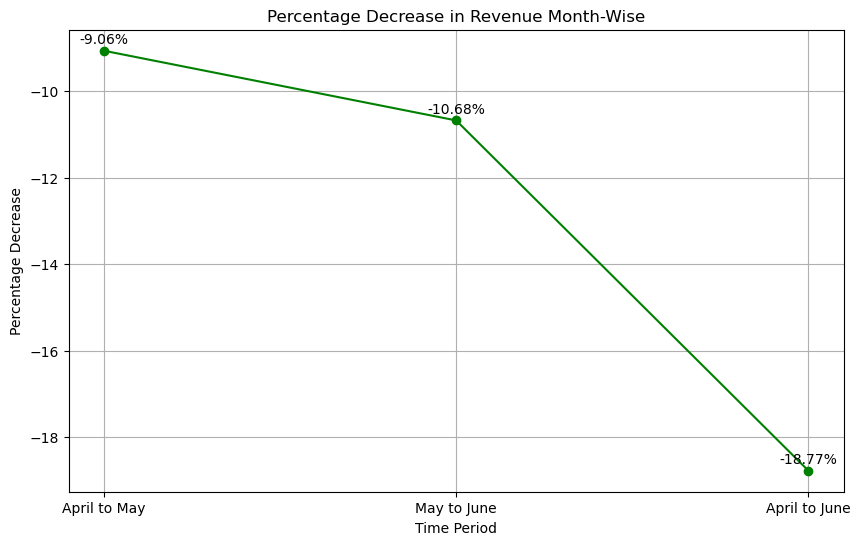

In [904]:
Decrease_revenue_april_to_may = Revenue_by_Month['May']-Revenue_by_Month['April']
Decrease_revenue_May_to_June = Revenue_by_Month['June']-Revenue_by_Month['May']
Decrease_revenue_April_to_June = Revenue_by_Month['June']-Revenue_by_Month['April']

Percentage_decrease_revenue_April_May = Decrease_revenue_april_to_may/Revenue_by_Month['April']*100
Percentage_decrease_revenue_May_June = Decrease_revenue_May_to_June/Revenue_by_Month['May']*100
Percentage_decrease_revenue_April_June = Decrease_revenue_April_to_June/Revenue_by_Month['April']*100

labels = ['April to May', 'May to June', 'April to June']
percentages = sorted([Percentage_decrease_revenue_April_June,Percentage_decrease_revenue_May_June,Percentage_decrease_revenue_April_May],reverse = True)



plt.figure(figsize=(10, 6))
plt.plot(labels, percentages, marker='o', color='green', linestyle='-')
plt.title('Percentage Decrease in Revenue Month-Wise')
plt.xlabel('Time Period')
plt.ylabel('Percentage Decrease')

# Annotated data points with their percentages
for i, txt in enumerate(percentages):
    plt.annotate(f'{txt:.2f}%', (labels[i], percentages[i]),
                 textcoords="offset points", xytext=(0, 5), ha='center')

plt.grid(True)
plt.show()


# Total Revenue in % by Category

In [905]:
Revenue_by_Category = df.groupby('Category')['Order_Amount_(INR)'].sum().sort_values(ascending = False)
percentage_by_Category = (Revenue_by_Category / Revenue_by_Category.sum()) * 100

result_df = pd.DataFrame({
    'Total Revenue': Revenue_by_Category.apply(lambda x: '₹ {:,.2f}'.format(x)),
    'Percentage': percentage_by_Category.apply(lambda x: '{:.2f}%'.format(x))
})
print(result_df)

                 Total Revenue Percentage
Category                                 
Set            ₹ 39,148,138.03     49.88%
kurta          ₹ 21,264,270.13     27.09%
Western Dress  ₹ 11,208,419.41     14.28%
Top             ₹ 5,343,281.30      6.81%
Ethnic Dress      ₹ 790,118.66      1.01%
Blouse            ₹ 458,128.18      0.58%
Bottom            ₹ 150,667.98      0.19%
Saree             ₹ 123,933.76      0.16%
Dupatta               ₹ 915.00      0.00%


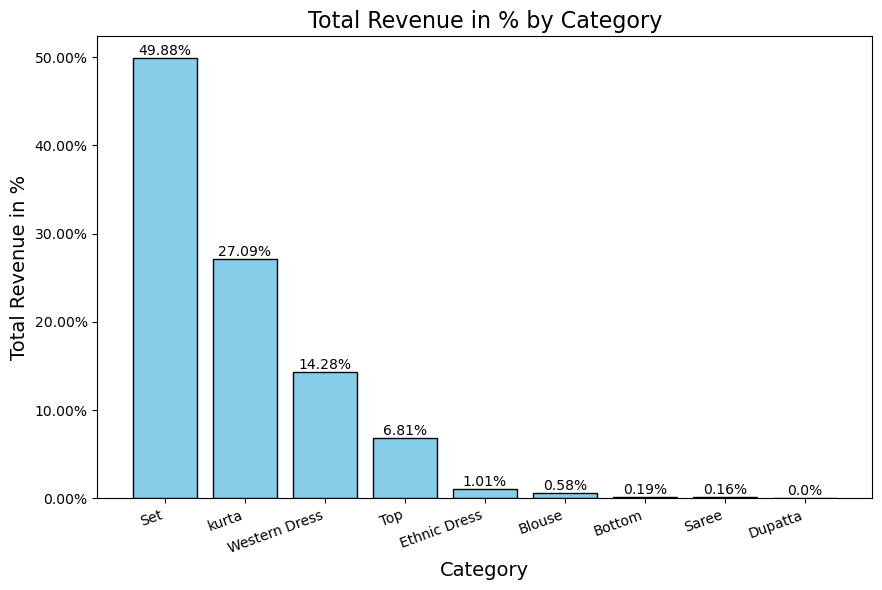

In [906]:
from matplotlib.ticker import FuncFormatter

Revenue_by_Category = df.groupby('Category')['Order_Amount_(INR)'].sum().sort_values(ascending=False)
percentage_by_Category = (Revenue_by_Category / Revenue_by_Category.sum()) * 100

result_df = pd.DataFrame({
    'Total Revenue': Revenue_by_Category,
    'Percentage': percentage_by_Category})

#  a bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Percentage
bars = ax1.bar(result_df.index, result_df['Percentage'], color='skyblue', edgecolor='black')
ax1.set_xlabel('Category', fontsize= 14) 
ax1.set_ylabel('Total Revenue in %', fontsize= 14)
ax1.tick_params(axis='y')

# Add annotations on top of the bars with '%' sign
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{round(yval, 2)}%", ha='center', va='bottom', color='black')

# Set x-axis labels to be horizontal
plt.xticks(rotation=20, ha='right')

# Format y-axis tick labels with '%' sign
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}%'))

plt.title('Total Revenue in % by Category', fontsize=16)
plt.show()


# Top 3 Performing Categories

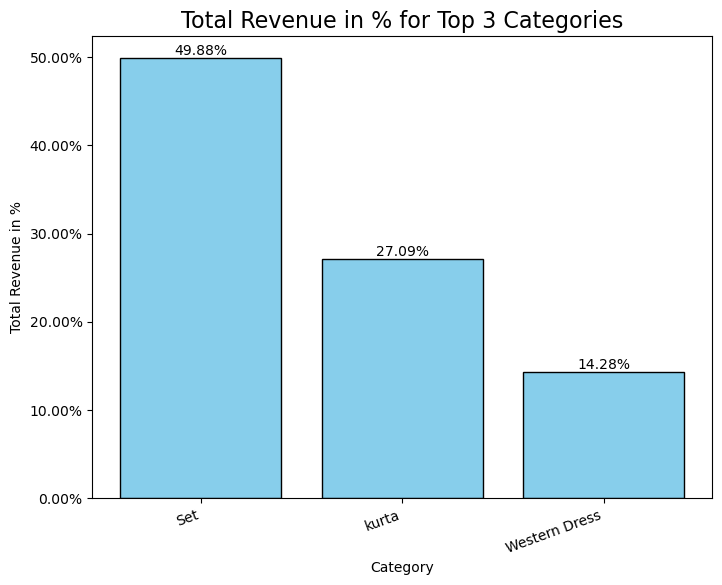

In [907]:
from matplotlib.ticker import FuncFormatter

Revenue_by_Category = df.groupby('Category')['Order_Amount_(INR)'].sum().sort_values(ascending=False)
percentage_by_Category = (Revenue_by_Category / Revenue_by_Category.sum()) * 100

# top 3 categories
top3_categories = Revenue_by_Category.head(3)
top3_percentage = percentage_by_Category.head(3)

result_df = pd.DataFrame({
    'Total Revenue': top3_categories,
    'Percentage': top3_percentage})

# bar chart
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar plot for Percentage
bars = ax1.bar(result_df.index, result_df['Percentage'], color='skyblue', edgecolor='black')
ax1.set_xlabel('Category') 
ax1.set_ylabel('Total Revenue in %')
ax1.tick_params(axis='y')

# annotations 
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{round(yval, 2)}%", ha='center', va='bottom', color='black')

# x-axis labels in  horizontal
plt.xticks(rotation=20, ha='right')

# y-axis tick labels with '%' sign
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}%'))

plt.title('Total Revenue in % for Top 3 Categories', fontsize=16)
plt.show()


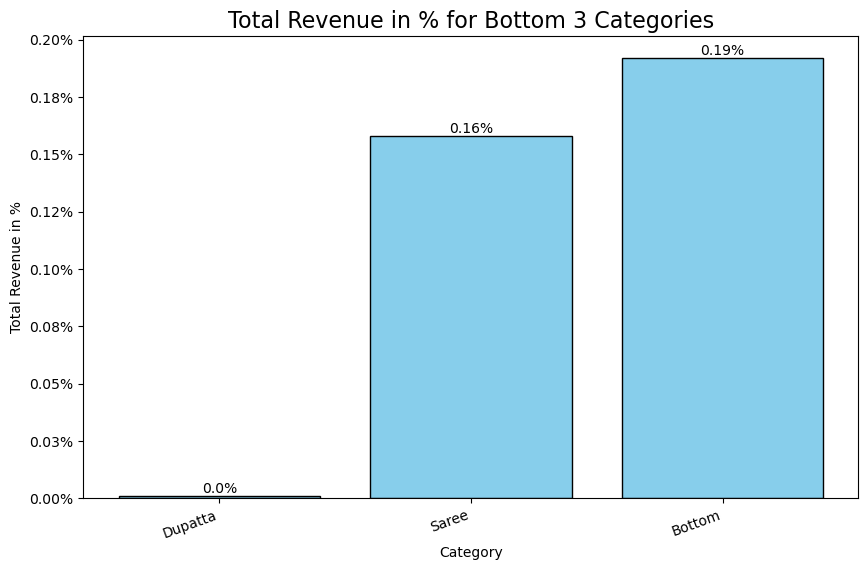

In [908]:
Revenue_by_Category = df.groupby('Category')['Order_Amount_(INR)'].sum().sort_values(ascending=True)
percentage_by_Category = (Revenue_by_Category / Revenue_by_Category.sum()) * 100

#  bottom 3 categories
bottom3_categories = Revenue_by_Category.head(3)
bottom3_percentage = percentage_by_Category.head(3)

result_df = pd.DataFrame({
    'Total Revenue': bottom3_categories,
    'Percentage': bottom3_percentage})

#  bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Percentage
bars = ax1.bar(result_df.index, result_df['Percentage'], color='skyblue', edgecolor='black')
ax1.set_xlabel('Category') 
ax1.set_ylabel('Total Revenue in %')
ax1.tick_params(axis='y')

# Add annotations on top of the bars with '%' sign
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{round(yval, 2)}%", ha='center', va='bottom', color='black')

# Set x-axis labels to be horizontal
plt.xticks(rotation=20, ha='right')

# Format y-axis tick labels with '%' sign
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}%'))

plt.title('Total Revenue in % for Bottom 3 Categories', fontsize=16)
plt.show()


# Top 5 Product Categories by Average Price in Dollars

In [909]:
average_price_by_category = df.groupby('Category')['Order_Amount_($)'].mean()

top_5_categories = average_price_by_category.sort_values(ascending=False).head(5)

print('Top 5 Product Categories by Average Price in Dollars:')
print(top_5_categories.apply(lambda x: '${:.2f}'.format(x)))


Top 5 Product Categories by Average Price in Dollars:
Category
Set              $9.43
Saree            $9.14
Western Dress    $8.75
Ethnic Dress     $8.25
Top              $6.09
Name: Order_Amount_($), dtype: object


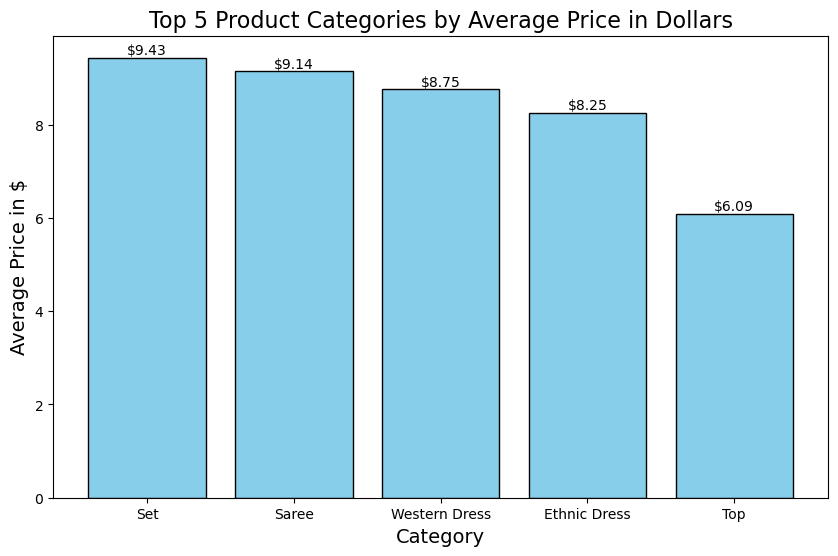

In [910]:
average_price_by_category = df.groupby('Category')['Order_Amount_($)'].mean()

# top 5 categories
top_5_categories = average_price_by_category.sort_values(ascending=False).head(5)

#  bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for Average Price
bars = ax.bar(top_5_categories.index, top_5_categories.values, color='skyblue', edgecolor='black')
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Average Price in $',fontsize=14)

# annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '${:.2f}'.format(yval), ha='center', va='bottom', color='black')

# x-axis labels in  horizontal
plt.xticks(rotation=0, ha='center')

plt.title('Top 5 Product Categories by Average Price in Dollars', fontsize=16)
plt.show()


# Checked unique values in Courier status

In [911]:
df['Courier_Status'].unique()

array(['Unknown', 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

# Checked unique values in Shipment status

In [912]:
df['Shipment_status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [913]:
courier_status_counts = df['Courier_Status'].value_counts()
print(courier_status_counts)

Shipped      109331
Unknown        6866
Unshipped      6677
Cancelled      5923
Name: Courier_Status, dtype: int64


# Made necessary changes in courier status column values to get count of cancelled and returned orders

In [914]:
total_orders = df.shape[0]
df.loc[df['Shipment_status'].isin(['Shipped - Returned to Seller', 'Shipped - Returning to Seller']), 'Courier_Status'] = 'Returned'
order_status_counts = df['Courier_Status'].value_counts().to_dict()
shipped_count = order_status_counts.get('Shipped')
returned_count = order_status_counts.get('Returned')
cancelled_count = order_status_counts.get('Cancelled') + order_status_counts.get('Unshipped') + order_status_counts.get('Unknown')

# print('total Orders    :',total_orders)
# print('Shipped Orders  :', shipped_count)
# print('Returned Orders :',returned_count)
# print('Cancelled Orders:',cancelled_count)

# Calculated the total number of orders and their percentages
percentage_shipped = (shipped_count/ total_orders) * 100
percentage_cancelled = (cancelled_count / total_orders) * 100
percentage_returned = (returned_count / total_orders) * 100
returned_cancelled  =((cancelled_count+returned_count)/total_orders)*100

print('Total Number of Oders:', total_orders)
print('Orders Shipped:',shipped_count, f'({percentage_shipped:.2f}%)')
print('Oders Cancelled:', cancelled_count, f'({percentage_cancelled:.2f}%)')
print('Oders Returned:', returned_count, f'({percentage_returned:.2f}%)')
print('Oders Returned and cancelled:',cancelled_count+returned_count,f'({returned_cancelled:.2f}%)')


Total Number of Oders: 128797
Orders Shipped: 107237 (83.26%)
Oders Cancelled: 19463 (15.11%)
Oders Returned: 2097 (1.63%)
Oders Returned and cancelled: 21560 (16.74%)


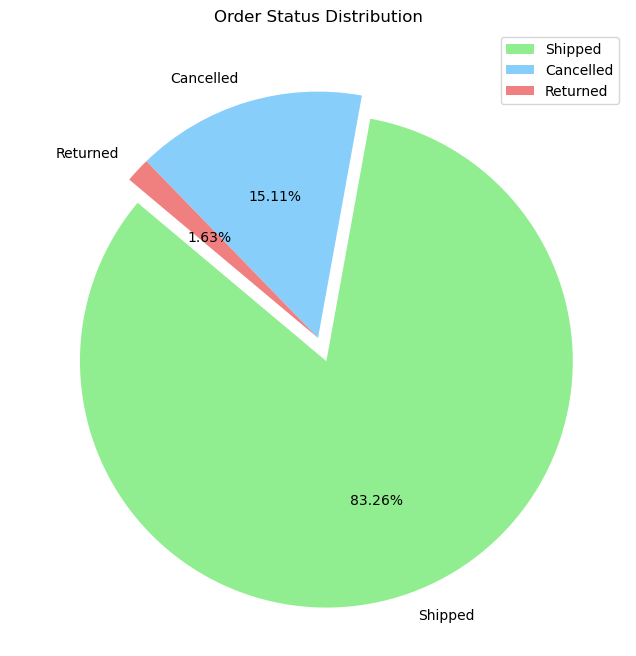

In [915]:

shipped_count = order_status_counts.get('Shipped')
cancelled_count = order_status_counts.get('Cancelled') + order_status_counts.get('Unshipped') + order_status_counts.get('Unknown')
returned_count = order_status_counts.get('Returned')

#  pie chart
labels = ['Shipped', 'Cancelled', 'Returned']
sizes = [shipped_count, cancelled_count, returned_count]
colors = ['lightgreen', 'lightskyblue', 'lightcoral']
explode = (0.1, 0, 0)  # explode the 1st slice (Shipped)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Order Status Distribution')
plt.legend(labels, loc='upper right')  
plt.show()


Cancelled Orders State-wise

In [916]:
order_status_counts = df['Courier_Status'].isin(['Cancelled', 'Unshipped', 'Unknown']).sum()

cancelled_orders = df[df['Courier_Status'].isin(['Cancelled', 'Unshipped', 'Unknown'])]

cancelled_orders_count_by_state = cancelled_orders['Ship_State'].value_counts()

print(cancelled_orders_count_by_state)

Maharashtra               3153
Karnataka                 2368
Telangana                 1718
Uttar Pradesh             1682
Tamil Nadu                1682
Kerala                    1216
Delhi                      957
Andhra Pradesh             940
West Bengal                929
Gujarat                    745
Haryana                    589
Rajasthan                  395
Madhya Pradesh             389
Odisha                     368
Bihar                      362
Assam                      271
Punjab                     260
Uttarakhand                247
Jharkhand                  244
Himachal Pradesh           149
Goa                        142
Chhattisgarh               134
Jammu & Kashmir            127
Pondicherry                 64
Andaman & Nicobar           50
Chandigarh                  41
Manipur                     39
Meghalaya                   38
Sikkim                      33
Nagaland                    25
Tripura                     23
Arunachal Pradesh           22
Mizoram 

In [917]:
df.head()

,Order_ID,Order_Date,Order_Month,Shipment_status,Fulfilment,Ship-Service-Level,Style,SKU,Category,Size,ASIN,Courier_Status,Quantity,Order_Amount_(INR),Order_Amount_($),Ship_City,Ship_State,Ship-Postal-Code,Promotion_IDs,Customer_Type
0,405-8078784-5731545,2022-04-30,April,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,7.84,Mumbai,Maharashtra,400081.0,No Promotion,Customer
1,171-9198151-1101146,2022-04-30,April,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,4.91,Bengaluru,Karnataka,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,Customer
2,404-0687676-7273146,2022-04-30,April,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,3.98,Navi Mumbai,Maharashtra,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Business
3,403-9615377-8133951,2022-04-30,April,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,753.33,9.11,Puducherry,Pondicherry,605008.0,No Promotion,Customer
4,407-1069790-7240320,2022-04-30,April,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,6.94,Chennai,Tamil Nadu,600073.0,No Promotion,Customer


# Average Order Amount by Customer Type

In [918]:
average_order_amount_by_customer_type = df.groupby('Customer_Type')['Order_Amount_($)'].mean()

print('Average Order Amount by Customer Type:')
print(average_order_amount_by_customer_type.apply(lambda x: '$ {:.2f}'.format(x)))


Average Order Amount by Customer Type:
Customer_Type
Business    $ 8.21
Customer    $ 7.37
Name: Order_Amount_($), dtype: object


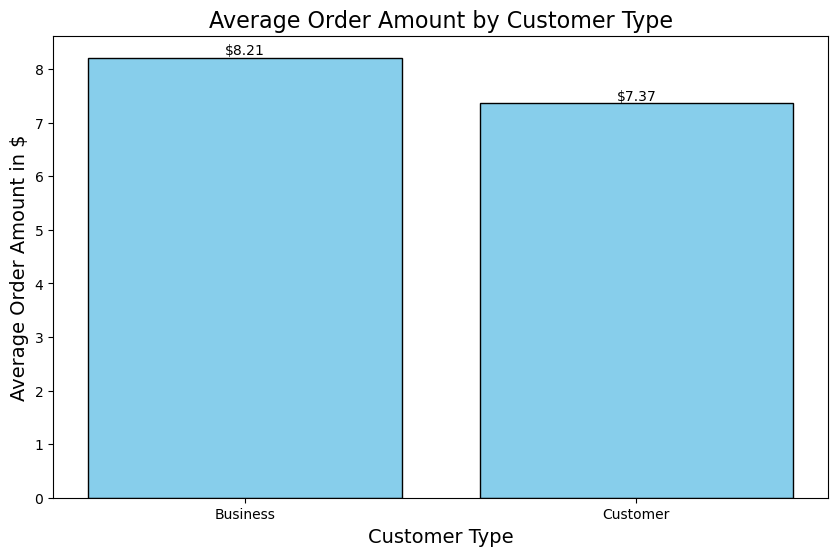

In [919]:

average_order_amount_by_customer_type = df.groupby('Customer_Type')['Order_Amount_($)'].mean()

# bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for Average Order Amount
bars = ax.bar(average_order_amount_by_customer_type.index, average_order_amount_by_customer_type.values, color='skyblue', edgecolor='black')
ax.set_xlabel('Customer Type', fontsize=14)
ax.set_ylabel('Average Order Amount in $', fontsize=14)

# annotations on top of the bars with dollar sign
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '${:.2f}'.format(yval), ha='center', va='bottom', color='black')

# Set x-axis labels to be horizontal
plt.xticks(rotation=0, ha='center')

plt.title('Average Order Amount by Customer Type', fontsize=16)
plt.show()


# Most Popular Product Category -State wise

In [920]:
popularity_by_state_category = df.groupby(['Ship_State', 'Category']).size().reset_index(name='Count')

most_popular_category_by_state = popularity_by_state_category.groupby('Ship_State')[['Category', 'Count']].max()
Most_popular_category_by_state = most_popular_category_by_state.sort_values(by='Count', ascending=False)

print('Most Popular Product Category by State:')
print(Most_popular_category_by_state)


Most Popular Product Category by State:
                             Category  Count
Ship_State                                  
Maharashtra                     kurta   8436
Karnataka                       kurta   6762
Tamil Nadu                      kurta   5812
Uttar Pradesh                   kurta   5147
Telangana                       kurta   4778
Delhi                           kurta   3154
Kerala                          kurta   2981
Andhra Pradesh                  kurta   2579
West Bengal                     kurta   2562
Haryana                         kurta   2027
Gujarat                         kurta   1722
Rajasthan                       kurta   1335
Bihar                           kurta   1162
Madhya Pradesh                  kurta   1139
Odisha                          kurta    953
Punjab                          kurta    892
Jharkhand                       kurta    727
Uttarakhand                     kurta    727
Assam                           kurta    725
Goa            

In [921]:
df.head()

,Order_ID,Order_Date,Order_Month,Shipment_status,Fulfilment,Ship-Service-Level,Style,SKU,Category,Size,ASIN,Courier_Status,Quantity,Order_Amount_(INR),Order_Amount_($),Ship_City,Ship_State,Ship-Postal-Code,Promotion_IDs,Customer_Type
0,405-8078784-5731545,2022-04-30,April,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,7.84,Mumbai,Maharashtra,400081.0,No Promotion,Customer
1,171-9198151-1101146,2022-04-30,April,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,4.91,Bengaluru,Karnataka,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,Customer
2,404-0687676-7273146,2022-04-30,April,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,3.98,Navi Mumbai,Maharashtra,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Business
3,403-9615377-8133951,2022-04-30,April,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,753.33,9.11,Puducherry,Pondicherry,605008.0,No Promotion,Customer
4,407-1069790-7240320,2022-04-30,April,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,6.94,Chennai,Tamil Nadu,600073.0,No Promotion,Customer


# Defined a function to calculate count of promotion  and no promotion values

In [922]:
def map_promotion(value):
    return 'No Promotion' if value == 'No Promotion' else 'Promotion'

# Checked Promotion Status 

In [923]:
Promotion_status= df['Promotion_IDs'].apply(map_promotion).value_counts() 
print(Promotion_status)

Promotion       79709
No Promotion    49088
Name: Promotion_IDs, dtype: int64


# Calculated State-wise Promotion Status

In [924]:
state_promotion_counts = df.groupby(['Ship_State', df['Promotion_IDs'].apply(map_promotion)]).size().unstack(fill_value=0)
print(state_promotion_counts)

Promotion_IDs           No Promotion  Promotion
Ship_State                                     
Andaman & Nicobar                 69        188
Andhra Pradesh                  1820       3605
Apo                                1          0
Arunachal Pradesh                 27        120
Assam                            441       1222
Bihar                            559       1549
Chandigarh                        85        247
Chhattisgarh                     216        692
Dadra and Nagar Haveli            19         51
Delhi                           2563       4394
Goa                              333        803
Gujarat                         1847       2633
Haryana                         1622       2785
Himachal Pradesh                 218        570
Jammu & Kashmir                  179        522
Jharkhand                        415       1039
Karnataka                       7357       9944
Kerala                          2132       4443
Ladakh                             7    

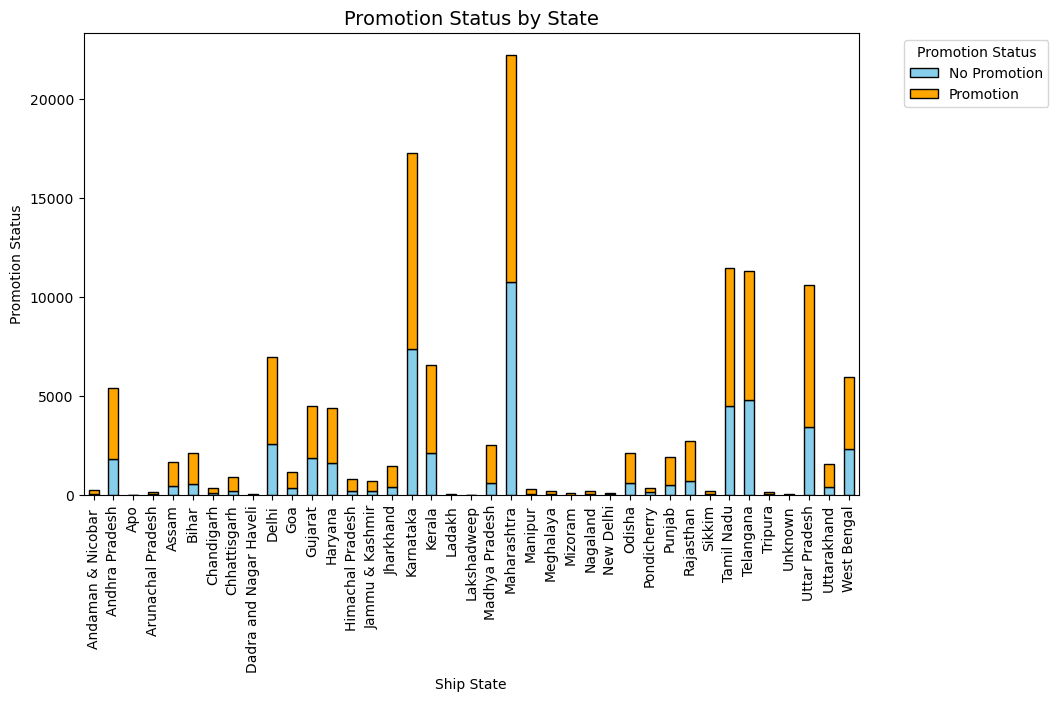

In [925]:

# state wise  promotion counts
state_promotion_counts = df.groupby(['Ship_State', df['Promotion_IDs'].apply(map_promotion)]).size().unstack(fill_value=0)

#  stacked bar chart
ax = state_promotion_counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], edgecolor='black', figsize=(10, 6))

# labels and title
ax.set_xlabel('Ship State',fontsize = 10)
ax.set_ylabel('Promotion Status', fontsize = 10)
plt.title('Promotion Status by State', fontsize = 14)


# legend
ax.legend(title='Promotion Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show  plot
plt.show()


# Category Wise Promotion Status 

In [926]:
def map_promotion(value):
    return 'No Promotion' if value == 'No Promotion' else 'Promotion'

# promotion_status = df['Promotion_IDs'].apply(map_promotion).value_counts() 

category_promotion_count = df.groupby(['Category', df['Promotion_IDs'].apply(map_promotion)]).size().unstack(fill_value=0)
category_promotion_Status = category_promotion_count.sort_values(by='Promotion', ascending=False)
print(category_promotion_Status)

Promotion_IDs  No Promotion  Promotion
Category                              
Set                   17055      33151
kurta                 21829      27968
Western Dress          4394      11097
Top                    4678       5935
Ethnic Dress            509        649
Blouse                  427        498
Bottom                  148        292
Saree                    48        116
Dupatta                   0          3


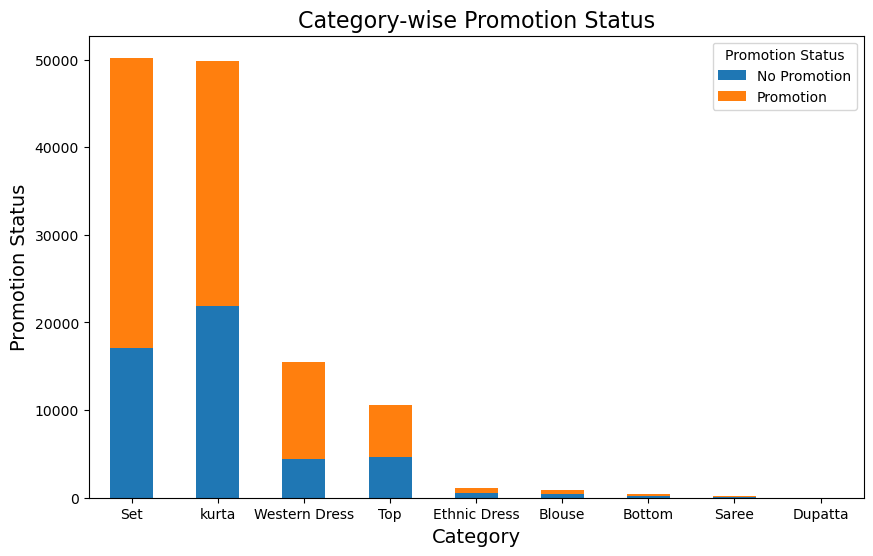

In [927]:
def map_promotion(value):
    return 'No Promotion' if value == 'No Promotion' else 'Promotion'

category_promotion_count = df.groupby(['Category', df['Promotion_IDs'].apply(map_promotion)]).size().unstack(fill_value=0)
category_promotion_Status = category_promotion_count.sort_values(by='Promotion', ascending=False)

ax = category_promotion_Status.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')


plt.title('Category-wise Promotion Status', fontsize= 16)
plt.xlabel('Category',fontsize= 14)
plt.ylabel('Promotion Status',fontsize= 14)
plt.legend(title='Promotion Status', loc='upper right')
plt.show()


# Promotion Status of Set in Top Performing States 

In [928]:

def map_promotion(value):
    return 'No Promotion' if value == 'No Promotion' else 'Promotion'

selected_category = 'Set'
selected_states = ['Maharashtra', 'Karnataka', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh']

filtered_df = df[df['Category'] == selected_category]
filtered_df = filtered_df[filtered_df['Ship_State'].isin(selected_states)].copy()


filtered_df['Promotion_Status'] = filtered_df['Promotion_IDs'].apply(map_promotion)

state_promotion_counts = filtered_df.groupby(['Ship_State', 'Promotion_Status']).size().unstack(fill_value=0)


print(state_promotion_counts)


Promotion_Status  No Promotion  Promotion
Ship_State                               
Karnataka                 2614       3819
Maharashtra               3780       4397
Tamil Nadu                1214       2174
Telangana                 1597       2266
Uttar Pradesh             1451       3696


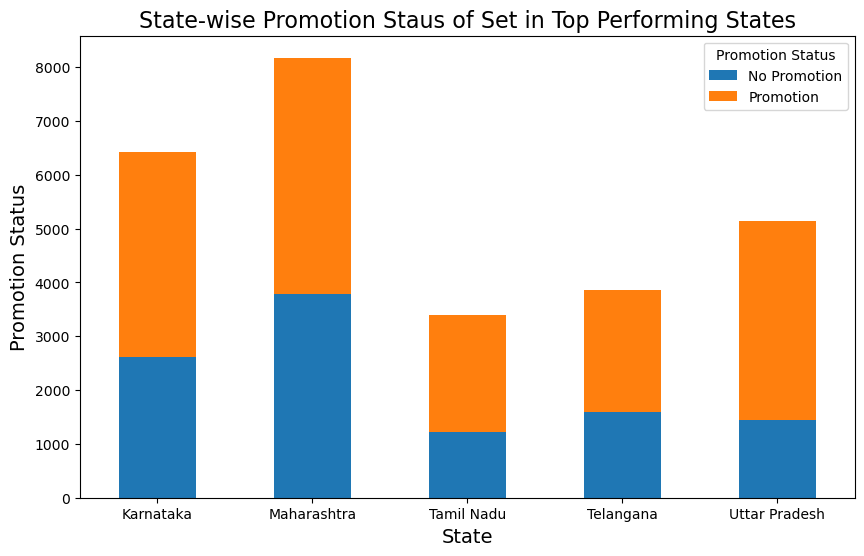

In [929]:
#  bar graph
ax= state_promotion_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
plt.title('State-wise Promotion Staus of Set in Top Performing States', fontsize = 16)
plt.xlabel('State',fontsize = 14)
plt.ylabel('Promotion Status', fontsize = 14)
plt.legend(title='Promotion Status')

plt.show()


# Least Popular Product Category 

In [930]:
popularity_by_state_category = df.groupby(['Ship_State', 'Category']).size().reset_index(name='Count')

least_popular_category_by_state = popularity_by_state_category.groupby('Ship_State')[['Category', 'Count']].min()
least_popular_category_by_state = least_popular_category_by_state.sort_values(by='Count', ascending=True)

print('Least Popular Product Category by State:')
print(least_popular_category_by_state)


Least Popular Product Category by State:
                            Category  Count
Ship_State                                 
Andaman & Nicobar             Bottom      1
Unknown                          Set      1
Apo                              Set      1
Arunachal Pradesh             Bottom      1
Tripura                       Blouse      1
Manipur                       Blouse      1
Chandigarh                    Blouse      1
Chhattisgarh                  Blouse      1
Karnataka                     Blouse      1
Pondicherry                   Blouse      1
New Delhi                     Blouse      1
Jammu & Kashmir               Blouse      1
Mizoram                 Ethnic Dress      1
Meghalaya                     Blouse      1
Sikkim                  Ethnic Dress      2
Telangana                     Blouse      2
Nagaland                Ethnic Dress      2
Ladakh                           Set      2
Lakshadweep                      Set      2
Himachal Pradesh              Blous

# Promotion Status of Least Pefroming Categories State wise 

In [931]:

def map_promotion(value):
    return 'No Promotion' if value == 'No Promotion' else 'Promotion'


state_category_counts = df.groupby(['Ship_State', 'Category']).size().unstack(fill_value=0)

least_performing_categories = state_category_counts.sum(axis=0).nsmallest(4).index


filtered_df = df[df['Category'].isin(least_performing_categories)].copy()


filtered_df['Promotion_Status'] = filtered_df['Promotion_IDs'].apply(map_promotion)


state_promotion_status = filtered_df.groupby(['Ship_State', 'Promotion_Status']).size().unstack(fill_value=0)


print(state_promotion_status)


Promotion_Status    No Promotion  Promotion
Ship_State                                 
Andaman & Nicobar              0          1
Andhra Pradesh                14         39
Arunachal Pradesh              0          1
Assam                          3         16
Bihar                          9         27
Chandigarh                     2          1
Chhattisgarh                   2          6
Delhi                         29         43
Goa                            3         14
Gujarat                       29         21
Haryana                       25         24
Himachal Pradesh               3          3
Jammu & Kashmir                3          5
Jharkhand                      7         14
Karnataka                    141        144
Kerala                         9         41
Madhya Pradesh                 9         26
Maharashtra                   97        106
Manipur                        2          6
Meghalaya                      1          3
New Delhi                      1

# Promotion Status of Dupatta in all states 

In [932]:
def map_promotion(value):
    return 'No Promotion' if value == 'No Promotion' else 'Promotion'

# Filtered  DataFrame for the 'Dupatta' category in all states
selected_category = 'Dupatta'
filtered_df = df[(df['Category'] == selected_category)].copy()

# Applied the promotion mapping function to get the promotion status
filtered_df['Promotion_Status'] = filtered_df['Promotion_IDs'].apply(map_promotion)

#  state-wise count of promotion for the 'Dupatta' category
state_promotion_counts = filtered_df.groupby(['Ship_State', 'Promotion_Status']).size().unstack(fill_value=0)
print(state_promotion_counts)


Promotion_Status  Promotion
Ship_State                 
Karnataka                 1
Telangana                 2


# Promotional Status of Western Dress in all States 

In [933]:
def map_promotion(value):
    return 'No Promotion' if value == 'No Promotion' else 'Promotion'

selected_category = 'Western Dress'
filtered_df = df[(df['Category'] == selected_category)].copy()

filtered_df['Promotion_Status'] = filtered_df['Promotion_IDs'].apply(map_promotion)

state_promotion_Status_Western_Dress = filtered_df.groupby(['Ship_State', 'Promotion_Status']).size().unstack(fill_value=0)
state_promotion_Status_Western_Dress_sorted = state_promotion_Status_Western_Dress.sort_values(by='Promotion', ascending=False)
print(state_promotion_Status_Western_Dress_sorted)




Promotion_Status        No Promotion  Promotion
Ship_State                                     
Maharashtra                     1077       1686
Karnataka                        655       1576
Telangana                        554       1213
Kerala                           261       1007
Tamil Nadu                       331        985
Uttar Pradesh                    251        761
Andhra Pradesh                   173        556
Gujarat                          226        462
West Bengal                      163        451
Delhi                            190        448
Haryana                          135        332
Madhya Pradesh                    49        201
Rajasthan                         48        199
Odisha                            35        158
Bihar                             27        150
Assam                             29        144
Punjab                            32        136
Goa                               20        107
Jharkhand                         25    

In [934]:
selected_category = 'Western Dress'
filtered_df = df[df['Category'] == selected_category].copy()

state_revenue_Western_Dress = filtered_df.groupby('Ship_State')['Order_Amount_(INR)'].sum().sort_values(ascending = False)
percentage_by_Revenue_Western_Dress = (state_revenue_Western_Dress / state_revenue_Western_Dress.sum()) * 100

Revenue_by_state_Western_Dress_result_df = pd.DataFrame({
    'Revenue by State for Western Dress': state_revenue_Western_Dress.apply(lambda x: '₹ {:,.2f}'.format(x)),
    'Revenue Percentage State-wise for Western Dress': percentage_by_Revenue_Western_Dress.apply(lambda x: '{:.2f}%'.format(x))
})

print(Revenue_by_state_Western_Dress_result_df)

                       Revenue by State for Western Dress  \
Ship_State                                                  
Maharashtra                                ₹ 2,000,558.26   
Karnataka                                  ₹ 1,636,808.33   
Telangana                                  ₹ 1,301,286.71   
Tamil Nadu                                   ₹ 955,717.07   
Kerala                                       ₹ 902,185.76   
Uttar Pradesh                                ₹ 722,799.84   
Andhra Pradesh                               ₹ 523,518.75   
Gujarat                                      ₹ 504,984.28   
Delhi                                        ₹ 466,581.06   
West Bengal                                  ₹ 430,081.64   
Haryana                                      ₹ 348,295.09   
Rajasthan                                    ₹ 176,736.64   
Madhya Pradesh                               ₹ 170,383.40   
Odisha                                       ₹ 141,860.68   
Bihar                   

# State-wise Revenue 

In [935]:
revenue_by_state = df.groupby('Ship_State')['Order_Amount_(INR)'].sum().sort_values(ascending = False)
percentage_by_Revenue = (revenue_by_state / revenue_by_state.sum()) * 100
Revenue_by_state_result_df = pd.DataFrame({
    'Revenue by State': revenue_by_state.apply(lambda x: '₹ {:,.2f}'.format(x)),
    'Revenue Percentage State-wise': percentage_by_Revenue.apply(lambda x: '{:.2f}%'.format(x))})
print(Revenue_by_state_result_df)

                       Revenue by State Revenue Percentage State-wise
Ship_State                                                           
Maharashtra             ₹ 13,318,228.14                        16.97%
Karnataka               ₹ 10,467,569.94                        13.34%
Telangana                ₹ 6,912,535.65                         8.81%
Uttar Pradesh            ₹ 6,805,130.08                         8.67%
Tamil Nadu               ₹ 6,506,597.16                         8.29%
Delhi                    ₹ 4,338,988.46                         5.53%
Kerala                   ₹ 3,825,250.06                         4.87%
West Bengal              ₹ 3,498,907.44                         4.46%
Andhra Pradesh           ₹ 3,216,210.72                         4.10%
Haryana                  ₹ 2,878,695.80                         3.67%
Gujarat                  ₹ 2,724,060.82                         3.47%
Rajasthan                ₹ 1,759,619.16                         2.24%
Madhya Pradesh      

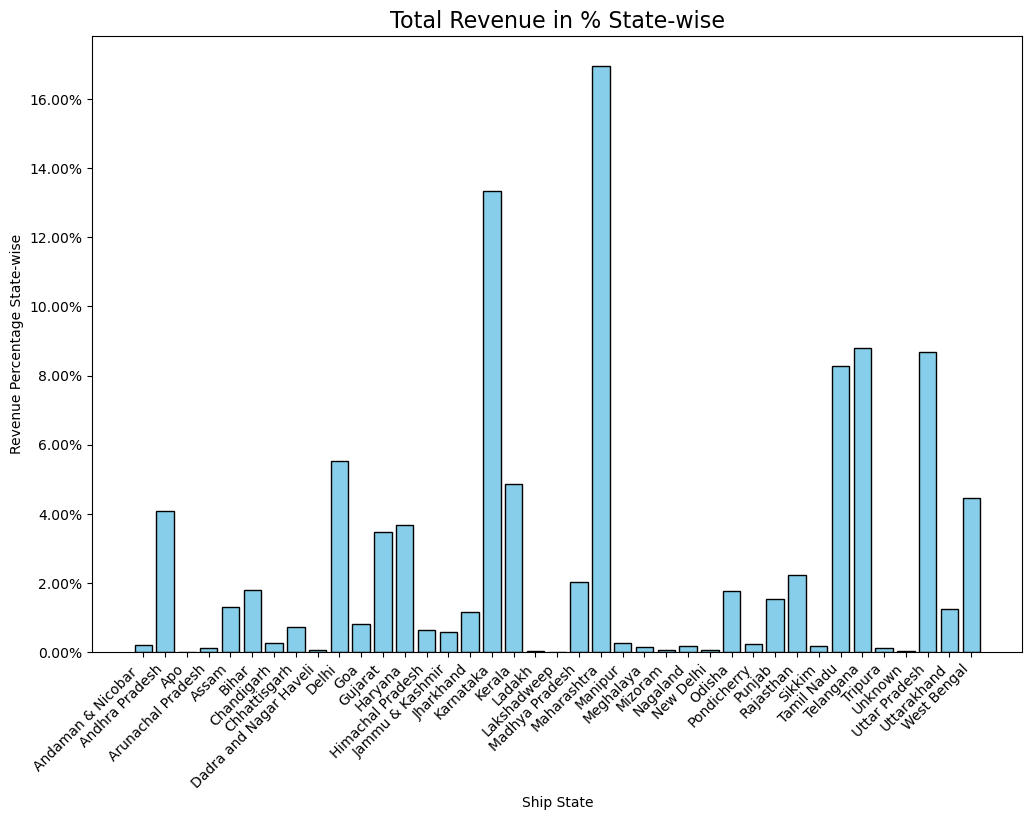

In [936]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

revenue_by_state = df.groupby('Ship_State')['Order_Amount_(INR)'].sum()
percentage_by_Revenue = (revenue_by_state / revenue_by_state.sum()) * 100

# bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(percentage_by_Revenue.index, percentage_by_Revenue, color='skyblue', edgecolor='black', width=0.8)

# Add annotations on top of the bars with '%' sign
# for bar in bars:
#     yval = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width() / 2, yval, f"{round(yval, 2)}%", ha='center', va='bottom', color='black', fontsize=8)
    

# # x-axis ticks and labels horizontal
ax.set_xticks(range(len(percentage_by_Revenue.index)))
ax.set_xticklabels(percentage_by_Revenue.index, rotation=45, ha='right')

ax.set_xlabel('Ship State')
ax.set_ylabel('Revenue Percentage State-wise')

# y-axis tick labels with '%' sign
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}%'))

plt.title('Total Revenue in % State-wise', fontsize=16)
plt.show()


# Top 5 performing States

In [937]:
revenue_by_state = df.groupby('Ship_State')['Order_Amount_(INR)'].sum().sort_values(ascending = False)
percentage_by_Revenue = (revenue_by_state / revenue_by_state.sum()) * 100
Revenue_by_state_result_df = pd.DataFrame({
    'Revenue by State': revenue_by_state.apply(lambda x: '₹ {:,.2f}'.format(x)),
    'Revenue Percentage State-wise': percentage_by_Revenue.apply(lambda x: '{:.2f}%'.format(x))})
print(Revenue_by_state_result_df.head(5))

              Revenue by State Revenue Percentage State-wise
Ship_State                                                  
Maharashtra    ₹ 13,318,228.14                        16.97%
Karnataka      ₹ 10,467,569.94                        13.34%
Telangana       ₹ 6,912,535.65                         8.81%
Uttar Pradesh   ₹ 6,805,130.08                         8.67%
Tamil Nadu      ₹ 6,506,597.16                         8.29%


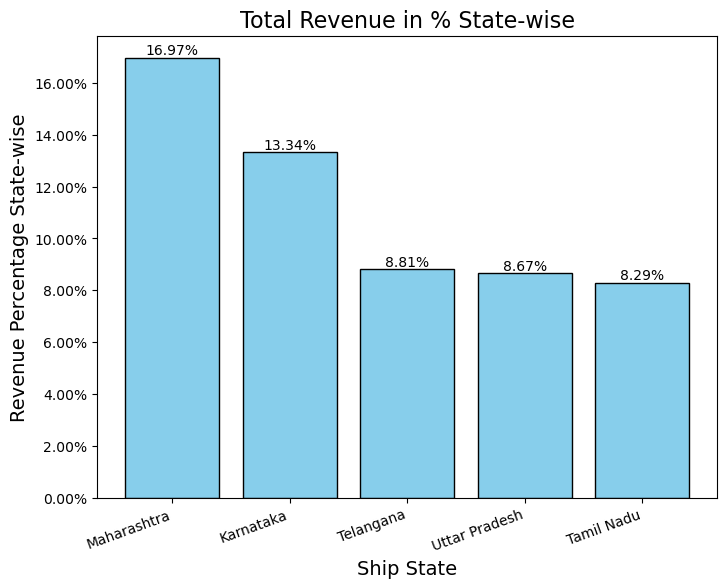

In [938]:
from matplotlib.ticker import FuncFormatter
revenue_by_state = df.groupby('Ship_State')['Order_Amount_(INR)'].sum().sort_values(ascending = False)
percentage_by_Revenue = (revenue_by_state / revenue_by_state.sum()) * 100
Revenue_by_state_result_df = pd.DataFrame({
    'Revenue by State': revenue_by_state.apply(lambda x: '₹ {:,.2f}'.format(x)),
    'Revenue Percentage State-wise': percentage_by_Revenue.apply(lambda x: '{:.2f}%'.format(x))})


top5_categories = revenue_by_state.head(5)
top5_percentage = percentage_by_Revenue.head(5)

result_df = pd.DataFrame({
    'Revenue by State': top5_categories,
    'Revenue Percentage State-wise': top5_percentage})

#  bar chart
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar plot for Percentage
bars = ax1.bar(result_df.index, result_df['Revenue Percentage State-wise'], color='skyblue', edgecolor='black')
ax1.set_xlabel('Ship State', fontsize =14) 
ax1.set_ylabel('Revenue Percentage State-wise',fontsize =14)
ax1.tick_params(axis='y')

# annotations 
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{round(yval, 2)}%", ha='center', va='bottom', color='black')

# x-axis labels to be horizontal
plt.xticks(rotation=20, ha='right')

# Format y-axis tick labels with '%' sign
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}%'))

plt.title('Total Revenue in % State-wise', fontsize=16)
plt.show()


In [939]:
df.head()

,Order_ID,Order_Date,Order_Month,Shipment_status,Fulfilment,Ship-Service-Level,Style,SKU,Category,Size,ASIN,Courier_Status,Quantity,Order_Amount_(INR),Order_Amount_($),Ship_City,Ship_State,Ship-Postal-Code,Promotion_IDs,Customer_Type
0,405-8078784-5731545,2022-04-30,April,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,7.84,Mumbai,Maharashtra,400081.0,No Promotion,Customer
1,171-9198151-1101146,2022-04-30,April,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,4.91,Bengaluru,Karnataka,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,Customer
2,404-0687676-7273146,2022-04-30,April,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,3.98,Navi Mumbai,Maharashtra,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Business
3,403-9615377-8133951,2022-04-30,April,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,753.33,9.11,Puducherry,Pondicherry,605008.0,No Promotion,Customer
4,407-1069790-7240320,2022-04-30,April,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,6.94,Chennai,Tamil Nadu,600073.0,No Promotion,Customer


Saved Cleaned Dataframe to Excel File

In [ ]:
excel_file_path = r"C:\Users\HP\Desktop\Data analyst\Data_Science_Project\Python\Amazon_project.xlsx"

df.to_excel(excel_file_path, index=False)

print(f'DataFrame has been saved to {excel_file_path}')

# Insights Summary:

1.The top contributors to the overall revenue include Maharashtra with a percentage of 16.97%, Karnataka with 13.34%, Telangana with 8.81%, Uttar Pradesh with 8.67%, and Tamil Nadu with 8.29%.  

2.The total revenue for April was ₹28,838,708.32, for May it was ₹26,224,517.75, and for June, it amounted to ₹23,424,646.38. There was a decrease in revenue from April to May, amounting to ₹ 2,614,190.57, reflecting a percentage decrease of 9.06%. The revenue further decreased from May to June by ₹ 2,799,871.37, indicating a percentage decrease of 10.68%. Overall, the decrease in revenue from April to June was ₹ 5,414,061.94, representing an 18.77% decrease.


3.The total revenue and percentage distribution for each category are as follows:Set generated a revenue of ₹39,148,138.03, representing 49.88% of the total revenue.Kurta contributed ₹21,264,270.13, making up 27.09% of the total revenue.Western Dress accounted for ₹11,208,419.41, comprising 14.28% of the total revenue.Top yielded ₹5,343,281.30, contributing to 6.81%. Ethnic Dress generated revenue of ₹790,118.66, constituting 1.01%. The Blouse category brought in ₹458,128.18, representing 0.58%. Bottom contributed ₹150,667.98, making up 0.19%. Saree accounted for ₹123,933.76, representing 0.16%. Dupatta, with ₹915.00, contributed 0.00% to the total revenue.

4.Set leads with an average price of 9.43 dollars Saree follows closely at 9.14 dollars. Western Dress comes in third with an average price of 8.75 dollars. Ethnic Dress has average price of 8.25 dollars.Top completes the top five with an average price of 6.09 dollars.

5.Out of a total of 128,797 orders, 83.26 % were Shipped,amonting 107237 shipped orders. 15.11% were cancelled, amounting to 19,463 cancellations. Additionally, 1.63% of the total orders, totaling 2,097 orders were returned. Notably, there were 21,560 orders that experienced both cancellation and return, representing 16.74% of the overall order volume.

6.Business customers have an average order amount of 8.21 dollars. Whereas, Customers in general have slightly lower average order amount at 7.37 dollars.

7.The data indicates that "Kurta" is the most popular product category across different states, with significant purchase counts in each region. The popularity of Kurta is evident as it consistently ranks as the most frequently purchased category in states such as Maharashtra, Karnataka, Tamil Nadu, Uttar Pradesh, Telangana, and others. This trend suggests a widespread preference for Kurta among customers across various regions.

8.There are 79,709 events of purchases with promotions, and 49,088 instances without any promotions.

9.The distribution of Promotion across different states reveals varying engagement levels. Maharashtra stands out with the highest promotional engagement, recording 10,761 instances, closely followed by Karnataka with 9,944. Delhi and Tamil Nadu also exhibit notable promotional activity, recording 4,394 and 6,955 instances, respectively. States like Uttar Pradesh, Gujarat, and Telangana demonstrate moderate promotional engagement, each with thousands of instances. On the other hand, regions such as Ladakh, Lakshadweep, and New Delhi show minimal promotional participation, with single-digit occurrences. Overall, this data highlights the diverse promotional landscape across different states, influencing customer engagement and purchase behaviors.

10.In the category-wise promotion data, the "Kurta" category leads in promotional engagement with 27,968 instances, followed by the "Set" category with 33,151 promotions. "Western Dress" and "Top" also show significant promotional activity, with 11,097 and 5,935 instances, respectively. Other categories such as "Ethnic Dress", "Blouse," "Bottom," and "Saree" exhibit relatively lower but still notable promotional engagement. Interestingly, the "Dupatta" category has no recorded instances of promotions. This breakdown provides insights into the promotional strategies across different product categories, influencing customer engagement and purchase behavior in each category.

11.The state-wise promotion data indicates varying levels of promotional engagement. Maharashtra records 4,397 instances of promotions, closely followed by Karnataka with 3,819. Uttar Pradesh and Telangana also show notable promotional activity, with 3,696 and 2,266 instances, respectively. Tamil Nadu records 2,174 promotions. Overall, this data suggests diverse promotional strategies across different states, influencing customer engagement and purchase behavior. The distribution of promotions reflects the dynamic nature of marketing efforts, tailoring strategies to meet the preferences and responses of customers in specific regions.

12."Blouse" emerges as the least popular category in several states.


13.The provided data indeed suggests a trend where categories with lower performance, as indicated by fewer product orders, tend to have less promotion. States like "Andaman & Nicobar," "Arunachal Pradesh," "Chandigarh," and "Tripura" exhibit minimal or no promotion for the categories with lower product orders.


14.The revenue generated from the sale of Western dresses reveals significant figures in some of the top states. Maharashtra, for instance, contributed a substantial amount, reaching ₹2,000,558.26, representing 17.85% of the total revenue. Following closely, Karnataka showcased noteworthy performance, accounting for ₹1,636,808.33, equivalent to 14.60% of the overall earnings. Telangana also played a substantial role in the Western dress market, contributing ₹1,301,286.71, constituting 11.61% of the total revenue. These statistics underscore the economic significance and consumer demand for Western attire in these key states.

15.The revenue distribution among states reveals distinct contributions to the overall financial landscape. Maharashtra takes the lead with ₹13,318,228.14, constituting a notable 16.97% of the total revenue. Following closely is Karnataka, making a substantial impact with ₹10,467,569.94, representing 13.34% of the overall revenue. Telangana follows suit, contributing ₹6,912,535.65 and accounting for 8.81% of the total revenue. Uttar Pradesh and Tamil Nadu also play significant roles, generating revenues of ₹6,805,130.08 and ₹6,506,597.16, respectively.

# Conclusion:

The observed data indicates a clear correlation between promotional efforts and revenue generation, particularly in the top-performing states for the most popular products. In these states, where products demonstrate high performance, there is a notable presence of promotions. This strategic alignment suggests that effective promotional campaigns contribute significantly to increased revenue and customer engagement in these regions.
Conversely, for the least-performing products, there is a consistent trend of lower promotional activity. The limited promotion for these products may be contributing to their lower performance in terms of sales and revenue. Recognizing the impact of promotion as a key factor, enhancing promotional strategies for these products could potentially stimulate interest and improve their market performance.

# Thank You...